## 1. Data Preparation and Exploration

In [57]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix

# Load data
final_db = pd.read_csv('../01_data/final_data.csv')

# Define the target variable
def check_discrimination(row):
    if any(row[col] == 1 for col in ['EUD01_09', 'EUD01_96', 'EUD01_97', 'EUD01_99']):
        return 0  # No discrimination occurred
    elif any(row[col] == 1 for col in ['EUD01_01', 'EUD01_02', 'EUD01_03', 'EUD01_04', 
                                       'EUD01_05', 'EUD01_06', 'EUD01_07', 'EUD01_08']):
        return 1  # Discrimination occurred

# Create the binary discrimination variable
final_db['discrimination_occurred'] = final_db.apply(check_discrimination, axis=1)

# Drop variables used to construct discrimination_occurred
final_db.drop(['EUD01_01', 'EUD01_02', 'EUD01_03', 'EUD01_04', 
               'EUD01_05', 'EUD01_06', 'EUD01_07', 'EUD01_08',
               'EUD01_09', 'EUD01_96', 'EUD01_97', 'EUD01_99', 'arop_mod', 'Generation', 'IN05'], axis=1, inplace=True) 

# Check distribution of the binary discrimination variable
value_counts = final_db['discrimination_occurred'].value_counts()

# Calculate the percentages
percentages = value_counts / final_db.shape[0] * 100

# Round the percentages to 2 decimal places
percentages = percentages.round(2)

percentages

discrimination_occurred
0    61.44
1    38.56
Name: count, dtype: float64

/var/folders/rc/lkcpnkds55926rr708hlfnwr0000gn/T/ipykernel_73865/3454328258.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=percentages.index, y=percentages.values, palette='viridis')


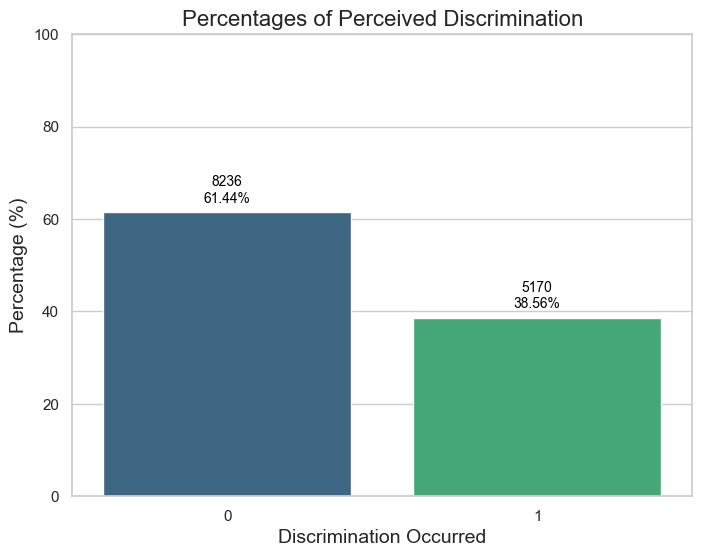

In [60]:
# Create the bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=percentages.index, y=percentages.values, palette='viridis')

# Add titles and labels
plt.title('Percentages of Perceived Discrimination', fontsize=16)
plt.xlabel('Discrimination Occurred', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)

# Add total count and percentage labels at the center of the bars
for i, p in enumerate(ax.patches):
    ax.annotate(f'{value_counts[i]}\n{percentages[i]:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points', rotation=0)

# Set y-axis limits to be from 0 to 100
plt.ylim(0, 100)

# Define the folder location to save the file
folder_path = '/Users/monserratlopez/Library/CloudStorage/GoogleDrive-lopezmonserrat.14@gmail.com/My Drive/4. Education/1_Master/2_Hertie_MDS/2_SecondSemester/1_MachineLearning/2_FinalProject/Employment-Bias/04_graphs'

# Save the plot in the specified folder as a PNG
file_path = os.path.join(folder_path, 'perceived_discrimination.png')
plt.savefig(file_path, dpi=300)  # Change file extension and DPI as needed

# Show the plot
plt.show()

In [27]:
final_db.head()

,id,HH02,HH03,HH04,IN02,SI03_3_H,PB01_mod,S01_mod,SI06_mod,HLS02_mod,...,DHE02_mod,DHE03_mod,DHE04_mod,RA04_mod,VV10,res_stat_mod_1,RA03,VH01a,DO27_mod,discrimination_occurred
0,165.0,37.0,1.0,1.0,8.0,15.0,0.0,1,0,0,...,0,3.0,1,0,1.0,0,10.0,3.0,1,1
1,317.0,30.0,1.0,1.0,8.0,19.0,2.0,1,1,0,...,0,3.0,1,1,1.0,0,4.0,0.0,1,0
2,321.0,35.0,1.0,1.0,8.0,17.0,0.0,1,1,0,...,0,3.0,1,1,0.0,0,8.0,1.0,1,0
3,322.0,42.0,1.0,4.0,8.0,14.0,2.0,1,0,0,...,1,1.0,1,1,2.0,0,11.0,14.0,1,1
4,327.0,39.0,1.0,5.0,8.0,10.0,1.0,0,0,0,...,0,3.0,1,0,0.0,0,7.0,1.0,1,0


In [28]:
# Split data
X = final_db.drop(['discrimination_occurred'], axis=1)
y = final_db['discrimination_occurred']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

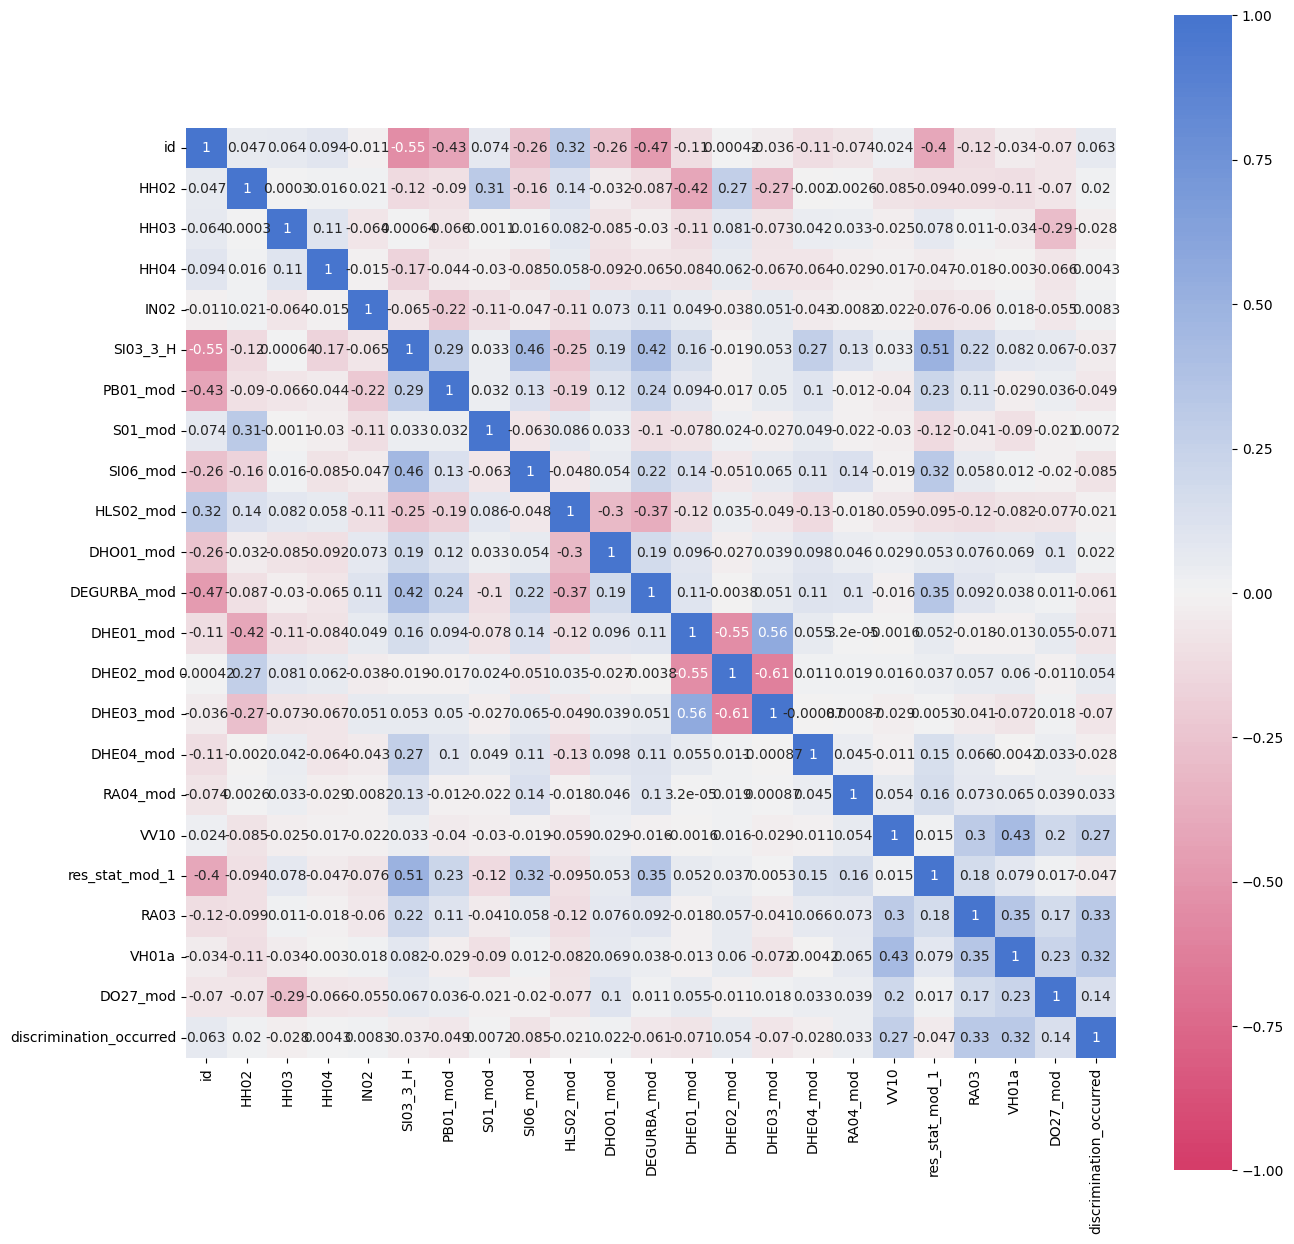

In [29]:
# Calculate correlation matrix
corr = final_db.corr()

# Plot correlation heatmap
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(0, 256, n=200),
    square=True,
    ax=ax,
    annot=True
)
plt.show()

## 2. Model Building and Evaluation

Accuracy for Random Forest: 0.7232720039781203
Random Forest Cross-Validation Accuracy: 0.7181361629329568


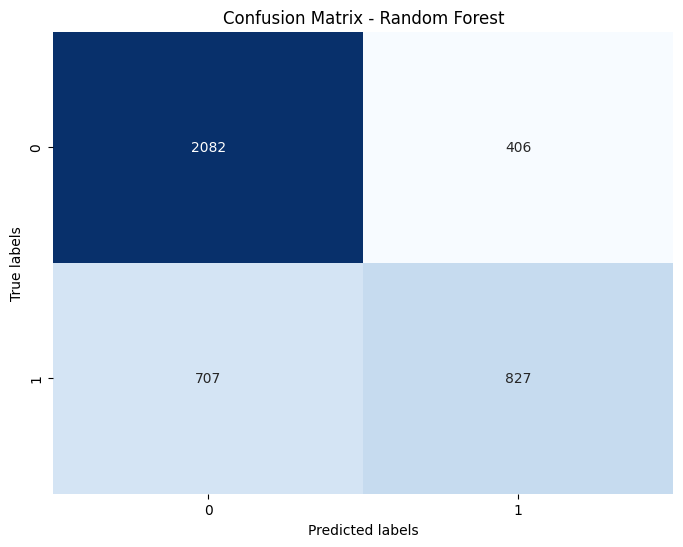

Accuracy for Logistic Regression: 0.7103431128791646
Logistic Regression Cross-Validation Accuracy: 0.7048160711019831


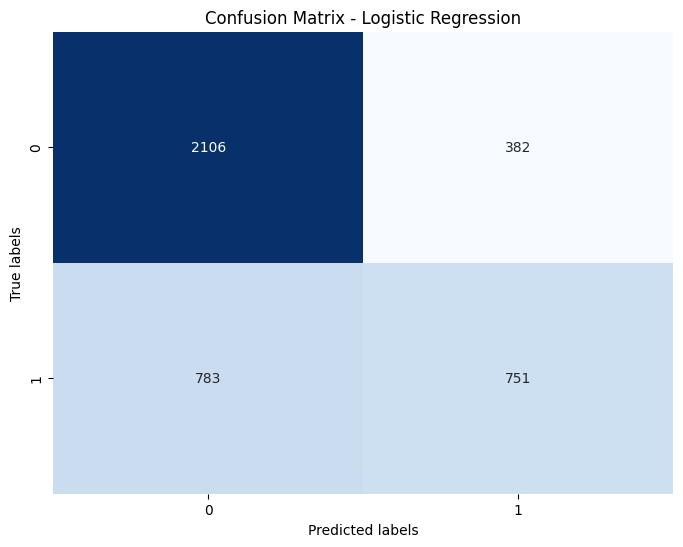

Accuracy for XGBoost: 0.7158130283441074
XGBoost Cross-Validation Accuracy: 0.704816127899963


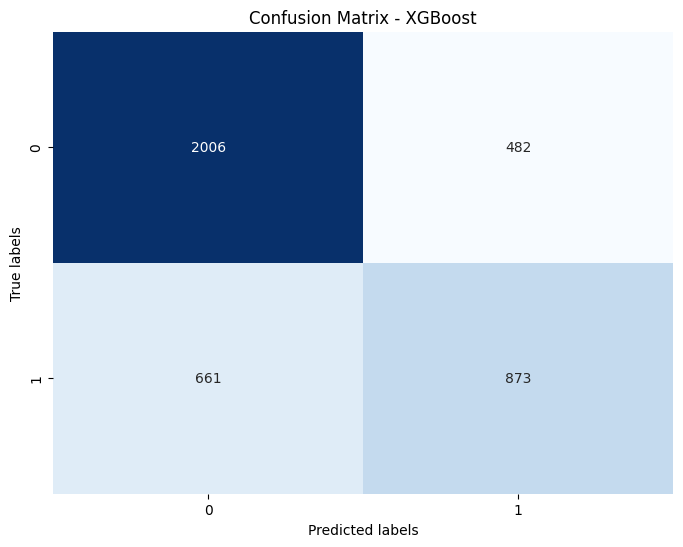

In [30]:
# Define preprocessing steps
preprocessor = StandardScaler()

# Define models
rf = RandomForestClassifier(random_state=42)
lr = LogisticRegression(random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Create pipelines for each model
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', rf)])
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', lr)])
xgb_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', xgb)])

# Train and evaluate models
models = [rf_pipeline, lr_pipeline, xgb_pipeline]
model_names = ['Random Forest', 'Logistic Regression', 'XGBoost']

for model, name in zip(models, model_names):
    # Train model
    model.fit(X_train, y_train)
    
    # Evaluate model
    accuracy = model.score(X_test, y_test)
    print(f"Accuracy for {name}: {accuracy}")
    
    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"{name} Cross-Validation Accuracy: {cv_scores.mean()}")
    
    # Confusion Matrix
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

## Feature Importance and Hyperparameter Tuning

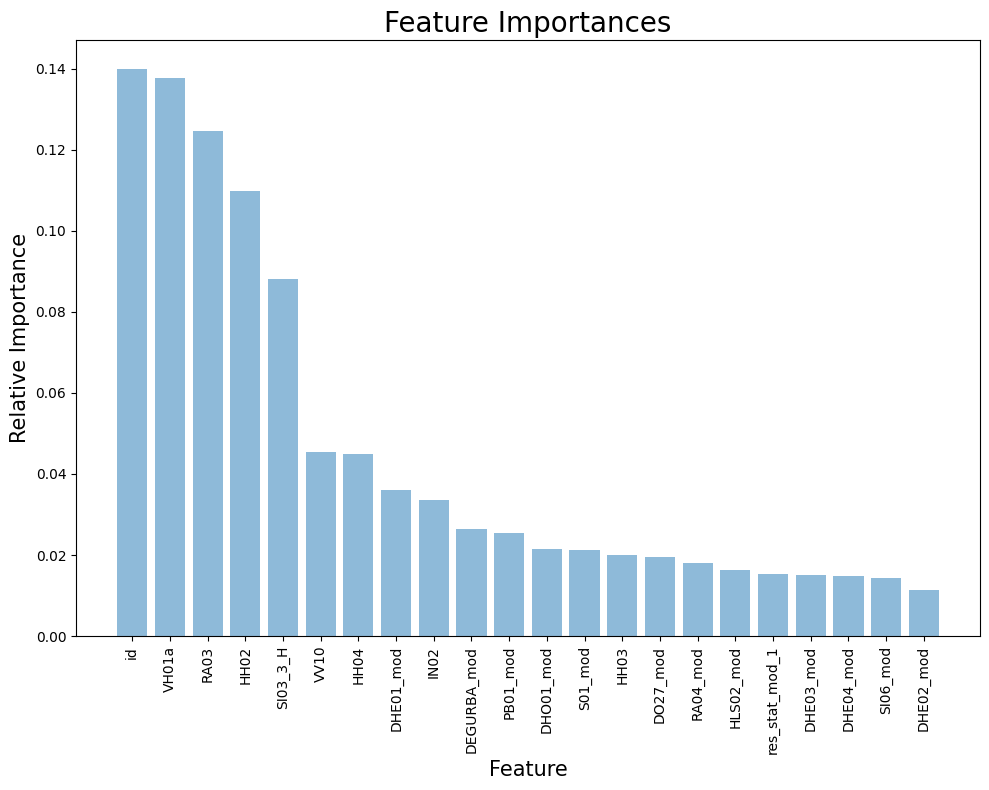

Best parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 300}


In [31]:
# Feature Importance
feature_importances = rf.feature_importances_
feature_names = X.columns
sorted_indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 8))
plt.title('Feature Importances', fontsize=20)
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices], align='center', alpha=0.5)
plt.xticks(range(len(feature_importances)), feature_names[sorted_indices], rotation=90)
plt.ylabel('Relative Importance', fontsize=15)
plt.xlabel('Feature', fontsize=15)
plt.tight_layout()
plt.show()

# Hyperparameter Tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

cv_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
cv_rf.fit(X_train_scaled, y_train)

print("Best parameters:", cv_rf.best_params_)

In [32]:
## Best parameters
best_params = cv_rf.best_params_
print("Best parameters:", best_params)

# Use best parameters to retrain the model
best_rf = RandomForestClassifier(**best_params, random_state=42)
best_rf.fit(X_train_scaled, y_train)

# Evaluate the model with best parameters
best_rf_score = best_rf.score(X_test_scaled, y_test)
print("Accuracy with best parameters:", best_rf_score)

Best parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 300}
Accuracy with best parameters: 0.7324714072600697
